In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy import integrate
sys.path.append('../')
from Scattering_Simulator import pairwise_method
from Scattering_Simulator import Read_PDB

c:\Users\htchi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This notebook was used for simulating small angle scattering curve of a protein crystal described in "Bond-centric modular design of protein assemblies" (https://doi.org/10.1101/2024.10.11.617872)

## Load the Coordinates of the Protein Crystal
The struture of the protein crystal is visualized in a 2D plot.

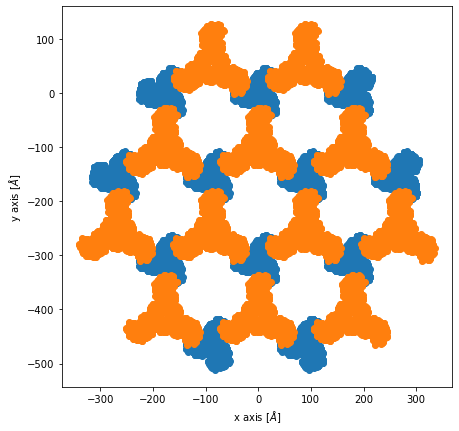

In [2]:
coords = Read_PDB.load_pdb('../Data/PDB/Churros/lattice_C3-36.pdb') 
coords2 = Read_PDB.load_pdb('../Data/PDB/Churros/lattice_C3-churro23.pdb')
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1])
plt.scatter(coords2[:,0], coords2[:,1])
plt.xlabel('x axis [$\AA$]')
plt.ylabel('y axis [$\AA$]')
coordinates = np.vstack((coords, coords2)) #all the coordinates will be saved as "coordinates"

## Sample from the Building Block
This performs the simulation of the structure to the scattering curve using the MC-DFM.  

In [3]:
n_samples = 10000000 #number of pairwise distances to create the pairwise distribution
simulator = pairwise_method.scattering_simulator(n_samples)
simulator.sample_building_block(coordinates) 
simulator.use_building_block_as_structure()

In [4]:
histogram_bins = 10000 #number of points in the pairwise distribution
q = np.geomspace(0.0003, 0.15, 6000) #The q-range of the simulated scattering curve 
I_q = simulator.simulate_scattering_curve_fast(coordinates, histogram_bins, q, save=True)

## Plot the Results
The results of the simulation is compared to experimental data. The experimental SAXS scattering curves correspond to protein crystals at different concentrations of  monodentate modulators.

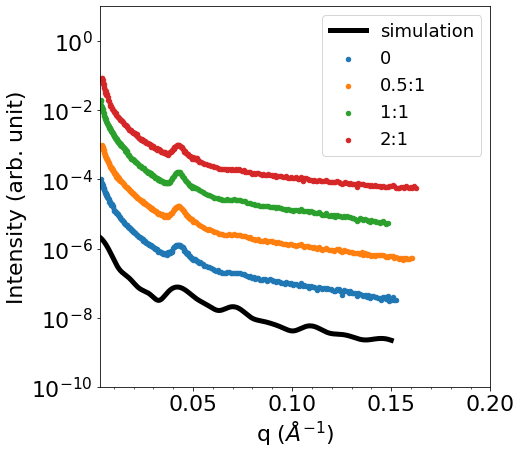

In [11]:
exp_data_0 = np.load('../Data/Protein_Crystals/240613/np_files/Protein_0.npy')
exp_data_20 = np.load('../Data/Protein_Crystals/240613/np_files/Protein_20.npy')
exp_data_5 = np.load('../Data/Protein_Crystals/240623/np_files/Protein_5.npy')
exp_data_10 = np.load('../Data/Protein_Crystals/240623/np_files/Protein_10.npy')

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(7,7))
background = 0
plt.scatter(exp_data_0[:,0], exp_data_0[:,1]*5e-5 + background, s=20, label = '0', color = 'C0')
plt.scatter(exp_data_5[:,0], exp_data_5[:,1]*5e-4 + background, s=20, label = '0.5:1', color = 'C1')
plt.scatter(exp_data_10[:,0], exp_data_10[:,1]*5e-3 + background, s=20, label = '1:1', color = 'C2')
plt.scatter(exp_data_20[:,0], exp_data_20[:,1]*5e-2 + background, s=20, label = '2:1', color = 'C3')
plt.plot(q, I_q*3e-13 + background, linewidth = 5, label = 'simulation', color ='k')
plt.yscale('log')
plt.ylabel('Intensity (arb. unit)')
plt.xlabel('q ($\AA^{-1}$)')
ax.minorticks_on()
plt.xlim([0.003, .2])
plt.ylim([1e-10, 1e1])

plt.legend(fontsize=18)
#plt.savefig('../Images/Proteins_Churros_all.png', dpi=300, bbox_inches="tight")
plt.show()

To verify what structure our simulated curve belongs to, we can plot all the randomly sampled points used to calculate the pairwise distribution and compare it with the structure of the protein crystal. 

In [12]:
struc = simulator.structure_coordinates_1

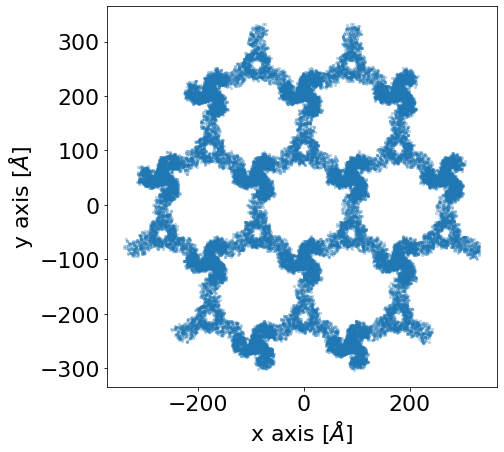

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(struc[:,0][::50], struc[:,1][::50], alpha = 0.25, s=5)
plt.xlabel('x axis [$\AA$]')
plt.ylabel('y axis [$\AA$]')
#plt.axis('off')
#plt.savefig('../Images/Sampled_Electron_Density_Tube_assembly_2.png', dpi=300, bbox_inches="tight")
plt.show()